In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [3]:
response = requests.get(endpoint)

In [4]:
response

<Response [200]>

In [5]:
result = response.json()
result

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [6]:
search_dict = {}
for line in result:
    count = int(line.get('query_count'))
    text = line.get('query_text')
    if text in search_dict:
        search_dict[text] += count
    else:
        search_dict[text] = count

In [7]:
search_df = pd.DataFrame.from_dict(search_dict, orient = 'index')
search_df = search_df.reset_index()
search_df.columns = ['term', 'text']
search_df.head()

,term,text
0,ebid,521
1,property maps,252
2,maps,237
3,property tax,214
4,jobs,210


In [8]:
search_df = search_df.sort_values('text', ascending=False)
search_df.head(10)

,term,text
0,ebid,521
1,property maps,252
2,maps,237
10,property taxes,235
3,property tax,214
4,jobs,210
5,employment,189
7,police,167
8,criminal court clerk,167
9,media releases,165


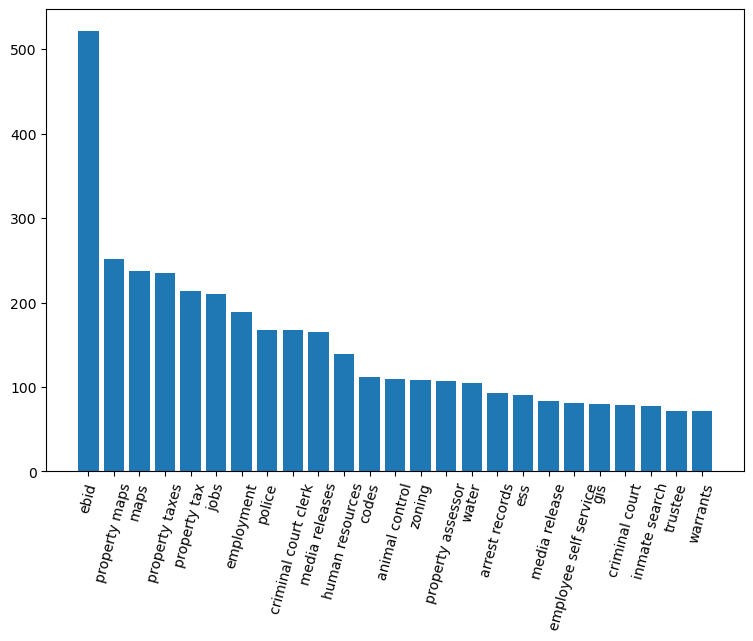

In [9]:
plt.figure(figsize=(9,6))
plt.bar('term', 'text', data = search_df.head(25))
plt.xticks(rotation = 75);

### Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches? 

In [10]:
response = requests.get('https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire')

In [11]:
fire_df = pd.read_json(response.text)
most_fire_df = fire_df[fire_df['query_count'] == fire_df['query_count'].max()]
most_fire = most_fire_df['month_name'].values[0]
print(f'Most fire searches in 2016: {most_fire}')

Most fire searches in 2016: August


### Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?  

In [12]:
endpoint2 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?'

response2 = requests.get(endpoint2)
response2

<Response [200]>

In [13]:
params2 = {
    '$limit' : 10000,
    '$where' : 'query_count > 100'
}

response2 = requests.get(endpoint2, params=params2)
response2
print(f'Number of times a query was run more than 100 times in a month: {len(response2.json())}')

Number of times a query was run more than 100 times in a month: 1262


### Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?  

In [14]:
endpoint3 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?'

response3 = requests.get(endpoint3)
response3

<Response [200]>

In [15]:
params3 = {
    'query_text' : 'codes',
    '$where' : 'query_count > 100'
}

response3 = requests.get(endpoint3, params=params3)
response3
print(f'Number of times codes was searched more than 100 times in a month: {len(response3.json())}')

Number of times codes was searched more than 100 times in a month: 56


### Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

### wrong/did not work

In [16]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

query4 = endpoint + "?" + "$query=SELECT year, SUM(query_count) WHERE query_text LIKE 'maps' GROUP BY year"
response4 = requests.get(query4).json()
response4

[{'year': '2014', 'SUM_query_count': '1406'},
 {'year': '2015', 'SUM_query_count': '1275'},
 {'year': '2016', 'SUM_query_count': '1515'},
 {'year': '2017', 'SUM_query_count': '2761'},
 {'year': '2018', 'SUM_query_count': '1789'},
 {'year': '2019', 'SUM_query_count': '1202'},
 {'year': '2020', 'SUM_query_count': '1357'},
 {'year': '2021', 'SUM_query_count': '431'}]

In [17]:
df = pd.DataFrame(response4)
df

,year,SUM_query_count
0,2014,1406
1,2015,1275
2,2016,1515
3,2017,2761
4,2018,1789
5,2019,1202
6,2020,1357
7,2021,431


In [18]:
print(df.columns)

Index(['year', 'SUM_query_count'], dtype='object')


In [19]:
df['SUM_quer_count'] = df['SUM_query_count'].astype(int)
df

,year,SUM_query_count,SUM_quer_count
0,2014,1406,1406
1,2015,1275,1275
2,2016,1515,1515
3,2017,2761,2761
4,2018,1789,1789
5,2019,1202,1202
6,2020,1357,1357
7,2021,431,431


In [20]:
years = df['year']
counts = df['SUM_query_count']

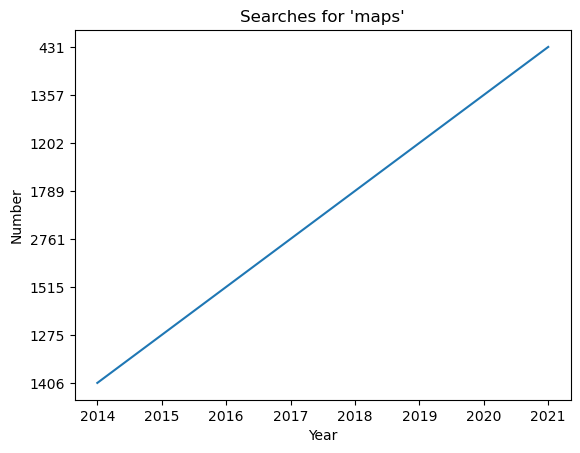

In [21]:
plt.plot(years, counts)
plt.xlabel("Year")
plt.ylabel("Number")
plt.title("Searches for 'maps'")
plt.show()

In [22]:
len(response4)

8

### new attempt

In [44]:
endpoint4 = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

params4 = {
    '$where': 'query_text == "maps"',
    '$limit': 200,  
    '$offset': 0
}

response4_data = []

while True: 
    response4 = requests.get(endpoint4, params=params4)
    response4_data.extend(response4.json())
    
    if len(response4.json()) < params4['$limit']:
        break
    
    params4['$offset'] += params4['$limit']
    
print(response4_data)

[{'month_name': 'January', 'year': '2014', 'query_count': '97', 'query_text': 'maps'}, {'month_name': 'February', 'year': '2014', 'query_count': '140', 'query_text': 'maps'}, {'month_name': 'March', 'year': '2014', 'query_count': '144', 'query_text': 'maps'}, {'month_name': 'April', 'year': '2014', 'query_count': '152', 'query_text': 'maps'}, {'month_name': 'May', 'year': '2014', 'query_count': '119', 'query_text': 'maps'}, {'month_name': 'June', 'year': '2014', 'query_count': '121', 'query_text': 'maps'}, {'month_name': 'July', 'year': '2014', 'query_count': '121', 'query_text': 'maps'}, {'month_name': 'August', 'year': '2014', 'query_count': '118', 'query_text': 'maps'}, {'month_name': 'September', 'year': '2014', 'query_count': '115', 'query_text': 'maps'}, {'month_name': 'October', 'year': '2014', 'query_count': '100', 'query_text': 'maps'}, {'month_name': 'November', 'year': '2014', 'query_count': '82', 'query_text': 'maps'}, {'month_name': 'December', 'year': '2014', 'query_count

In [45]:
response4_df = pd.DataFrame(response4_data)

In [46]:
len(response4_df)

82

In [47]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [48]:
response4_df['month_name']= pd.Categorical(response4_df['month_name'], categories=month_order, ordered=True)

In [49]:
graph = response4_df.pivot_table(index='month_name', columns='year', values='query_count')

In [50]:
graph4 = graph.fillna(0)

In [51]:
graph4

year,2014,2015,2016,2017,2018,2019,2020,2021
month_name,,,,,,,,
January,97.0,119.0,104.0,117.0,173.0,160.0,154.0,0.0
February,140.0,129.0,130.0,235.0,0.0,98.0,100.0,0.0
March,144.0,0.0,83.0,331.0,188.0,88.0,124.0,132.0
April,152.0,130.0,115.0,351.0,189.0,110.0,114.0,148.0
May,119.0,109.0,125.0,266.0,156.0,105.0,139.0,0.0
June,121.0,148.0,125.0,265.0,154.0,116.0,136.0,151.0
July,121.0,120.0,149.0,236.0,173.0,124.0,139.0,0.0
August,118.0,81.0,137.0,238.0,186.0,106.0,125.0,0.0
September,115.0,110.0,181.0,222.0,240.0,83.0,0.0,0.0


In [52]:
type(graph4)

pandas.core.frame.DataFrame

In [58]:
print(graph4.columns)

Index(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], dtype='object', name='year')


In [59]:
years = graph4.columns
sum_query_counts = graph4.sum()

In [60]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2014'),
  Text(1, 0, '2015'),
  Text(2, 0, '2016'),
  Text(3, 0, '2017'),
  Text(4, 0, '2018'),
  Text(5, 0, '2019'),
  Text(6, 0, '2020'),
  Text(7, 0, '2021')])

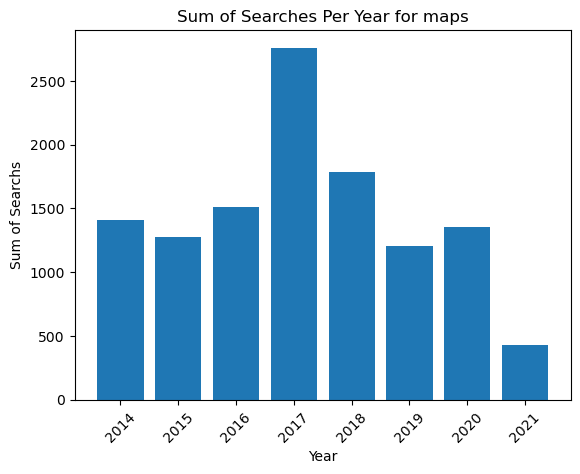

In [64]:
plt.bar(years, sum_query_counts)
plt.xlabel('Year')
plt.ylabel('Sum of Searchs')
plt.title('Sum of Searches Per Year for maps')
plt.xticks(rotation=45)